(14, 1)
Cost at initial theta (zeros): 0.6931471805599918
Train Accuracy: 70.6 %
Cost at optimized theta (zeros): 0.6056600145284284


Text(0.5, 1.0, 'Error vs. Training Epoch')

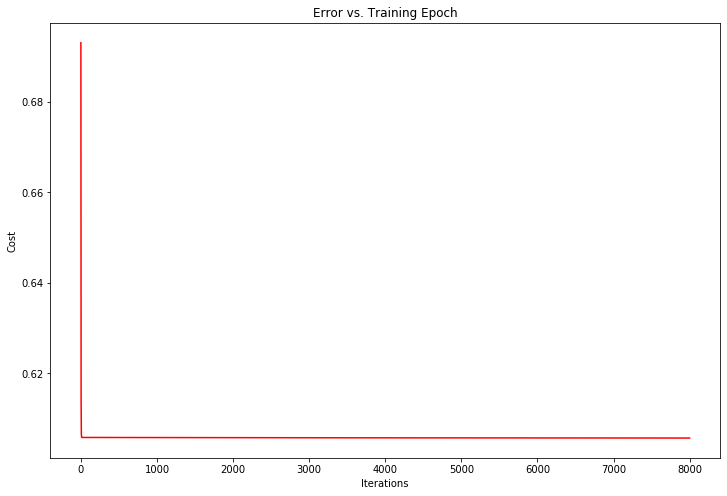

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
df=pd.read_csv("datasets_608073_1089480_Bank_Personal_Loan_Modelling.csv", header=None)
df.head()
df.describe()
X=df.iloc[:,:-1].values
y=df.iloc[:,-1].values
X=(X-(X.mean()))/(X.std())
def sigmoid(z):
    return 1/ (1 + np.exp(-z))

def costFunctionReg(theta,X,y,Lambda):
  m = len(y)
  y = y[:,np.newaxis]
  hypothesis = sigmoid(np.dot(X,theta))
  error = (-y * np.log(hypothesis)) - ((1-y)*np.log(1-hypothesis))
  cost = 1/m * sum(error)
  regCost = cost + Lambda/(2*m) * sum(theta**2)
  grad_0= 1/m * np.dot(X.transpose(),(hypothesis - y))[0]
  grad_1 = 1/m * np.dot(X.transpose(),(hypothesis - y))[1:] + (Lambda/m)* theta[1:]
  grad= np.vstack((grad_0[:,np.newaxis],grad_1)) #newaxis = .reshape() , vstack = adding new row
  return regCost[0], grad

out = np.ones(len(X)).reshape(len(X),1)
X=np.hstack((out,X))
a = int(X.shape[0]*0.8)
Lambda = 0.5
initial_theta = np.zeros((X.shape[1], 1))
print(initial_theta.shape)
cost, grad=costFunctionReg(initial_theta, X, y, Lambda)
print("Cost at initial theta (zeros):",cost)

def gradientDescent(X,y,theta,alpha,num_iters,Lambda):
    m=len(y)
    J_history =[]
    for i in range(num_iters):
        cost, grad = costFunctionReg(theta,X,y,Lambda)
        theta = theta - (alpha * grad)
        J_history.append(cost)
    return theta , J_history

theta , J_history = gradientDescent(X,y,initial_theta,0.1,8000,1)

def classifierPredict(theta,X):
    predictions = X.dot(theta)
    return predictions>0
p=classifierPredict(theta,X)
print("Train Accuracy:", (sum(p==y[:,np.newaxis])/len(y) *100)[0],"%")
cost1,grad1 = costFunctionReg(theta,X,y,Lambda)
print("Cost at optimized theta (zeros):",cost1)
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(np.arange(8000),J_history, 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Training Epoch')